# Top 10000 Movies

In [2]:
import pandas as pd

In [18]:
df = pd.read_csv('Top_10000_Movies.csv', engine='python')
df.head()

Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   
3                    ['Action', 'Crime', 'Thriller']   
4  ['Comedy', 'Action', 'Adventure', 'Science Fic...   

                                            overview      revenue  runtime  \
0  After finding a host body in investigative rep...  424000000.0     97.0   
1  The Eternals are a team of ancient aliens who ...  165000000.0    157.0   
2  Paul Atreides, a brilliant and gifted young ma...  331116356.0    155.0   
3  A mysterious woman recruits bank teller Ludwig...          0.0    127.0   
4  A bank teller called Guy realizes he is a back...  331096766.0    115.0   

                                          tagline  
0                                             NaN  
1                             In the beginning...  
2                    Beyond fear, destiny awaits.  
3    Before Vegas, one locksmith became a legend.  
4  Life's too short to be a background character.

In [33]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')


In [35]:
df.columns = df.columns.str.strip()


In [37]:
print(df.head())


  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


# Exploratory Data Analysis

# 1.Summary Statistics

In [24]:
import pandas as pd
df = pd.read_csv('Top_10000_Movies.csv', engine='python')
summary_statistics = df.describe()

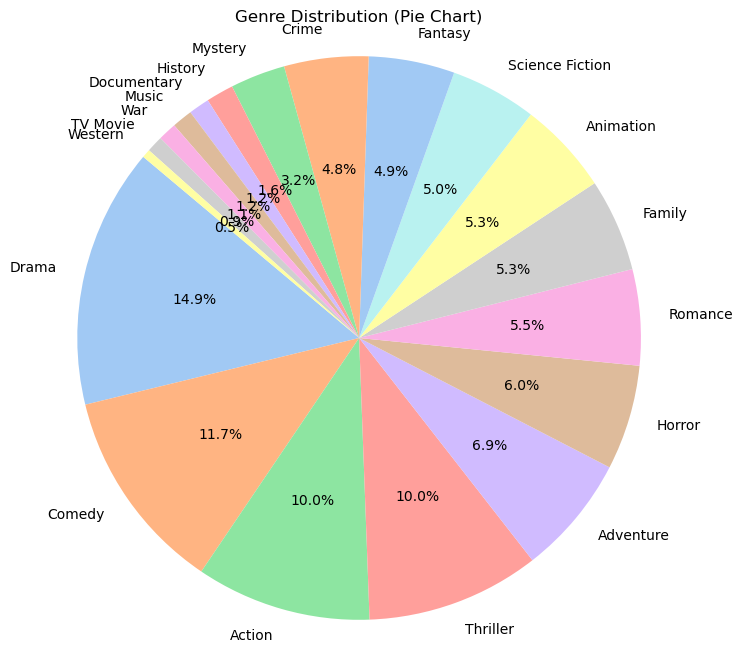

/var/folders/bc/7c123xfs22z0mtymrf9hw3bh0000gn/T/ipykernel_39506/730150699.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette="viridis")


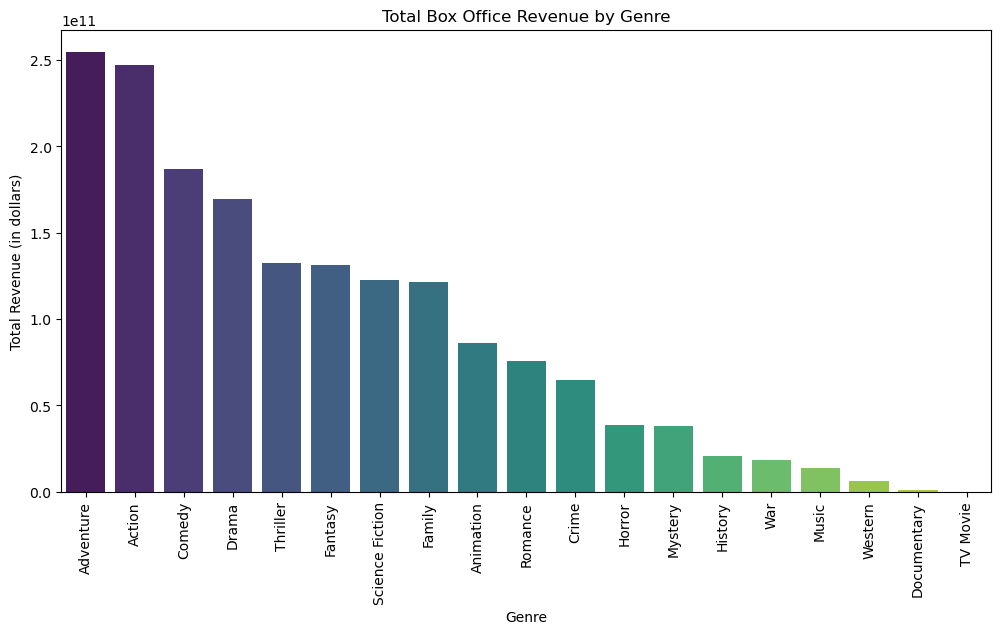

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Convert genre column from string to list
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Explode the genre list to have one genre per row
df_exploded = df.explode('genre')

# Pie chart: Genre distribution
def plot_genre_distribution(df_exploded):
    genre_counts = df_exploded['genre'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Genre Distribution (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Bar chart: Box office revenue by genre
def plot_revenue_by_genre(df_exploded):
    # Group by genre and calculate the average revenue per genre
    revenue_by_genre = df_exploded.groupby('genre')['revenue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=revenue_by_genre.index, y=revenue_by_genre.values, palette="viridis")
    plt.title('Total Box Office Revenue by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Total Revenue (in dollars)')
    plt.xticks(rotation=90)
    plt.show()

# Call the functions to generate the plots
plot_genre_distribution(df_exploded)
plot_revenue_by_genre(df_exploded)


# 2.Distribution Analysis

Column Names: Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')
First few rows of the DataFrame:
  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

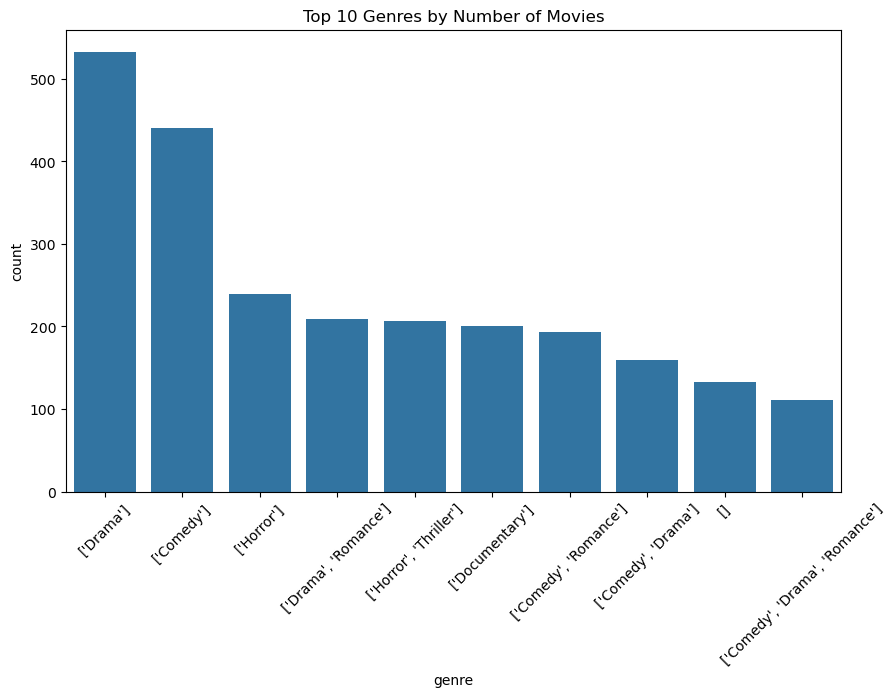

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Print column names
print("Column Names:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to understand the structure
print("First few rows of the DataFrame:")
print(df.head())

# After checking the column names, use the correct column names in your analysis
# Check if the column names contain 'rating', 'release_year', 'genre', etc.
plt.figure(figsize=(10, 6))
if 'rating' in df.columns:
    sns.histplot(df['rating'], bins=30, kde=True)
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'rating' not found.")

plt.figure(figsize=(10, 6))
if 'release_year' in df.columns:
    sns.histplot(df['release_year'], bins=30, kde=True)
    plt.title('Distribution of Release Years')
    plt.xlabel('Release Year')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'release_year' not found.")

plt.figure(figsize=(10, 6))
if 'genre' in df.columns:
    sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index[:10])
    plt.title('Top 10 Genres by Number of Movies')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'genre' not found.")


# 3.Correlation Analysis

Column Names: Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')
Data Types: Unnamed: 0            object
id                   float64
original_language     object
original_title        object
popularity           float64
release_date          object
vote_average         float64
vote_count           float64
genre                 object
overview              object
revenue              float64
runtime              float64
tagline               object
dtype: object


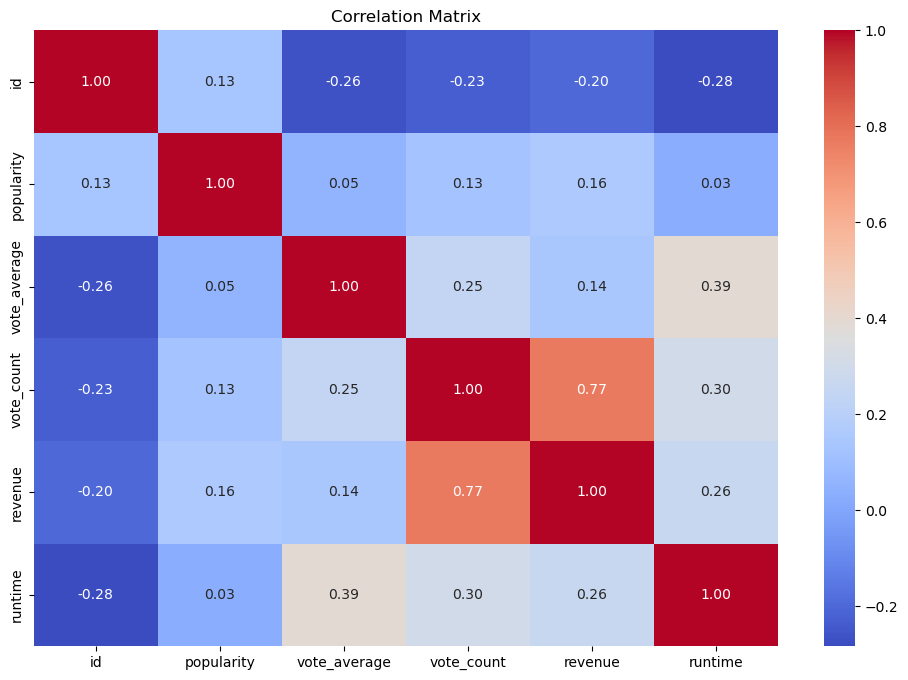

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print column names and check data types
print("Column Names:", df.columns)
print("Data Types:", df.dtypes)

# Create a correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Time Series Analysis


# 1.Number of Movies Released Per Year

Column Names:
Index(['Unnamed: 0', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')


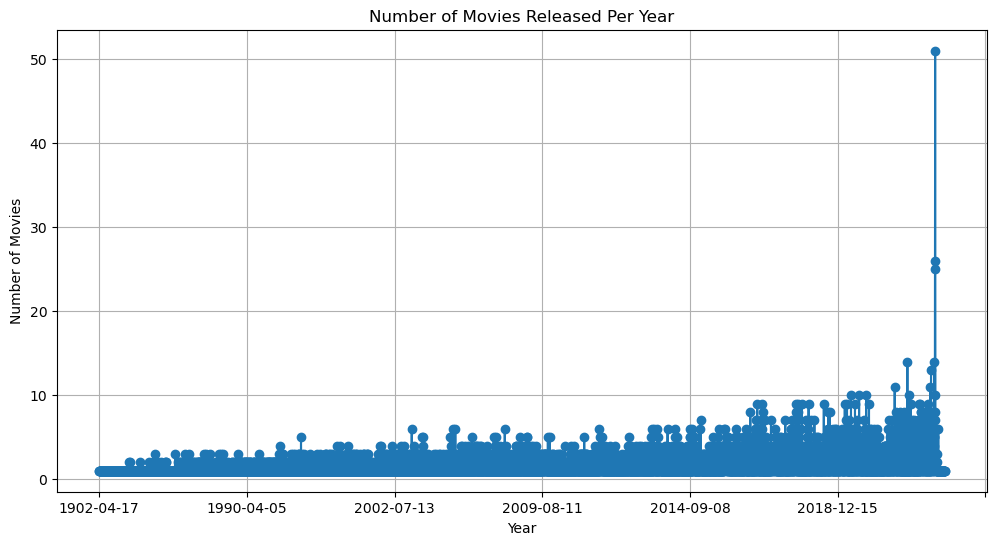

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')
df.columns = df.columns.str.strip()  # Strip any leading/trailing whitespace

# Check column names
print("Column Names:")
print(df.columns)

# Assuming the correct column name for the release year is found (replace 'Release Year' accordingly)
release_year_column = 'release_date'  # Replace with the actual name after checking

# Count the number of movies released per year
movies_per_year = df[release_year_column].value_counts().sort_index()

# Plotting the number of movies released per year
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()


# Basic Descriptive Analysis

In [62]:
df.describe()
df.isnull().sum()


Unnamed: 0              0
id                     12
original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

# Genre Distribution

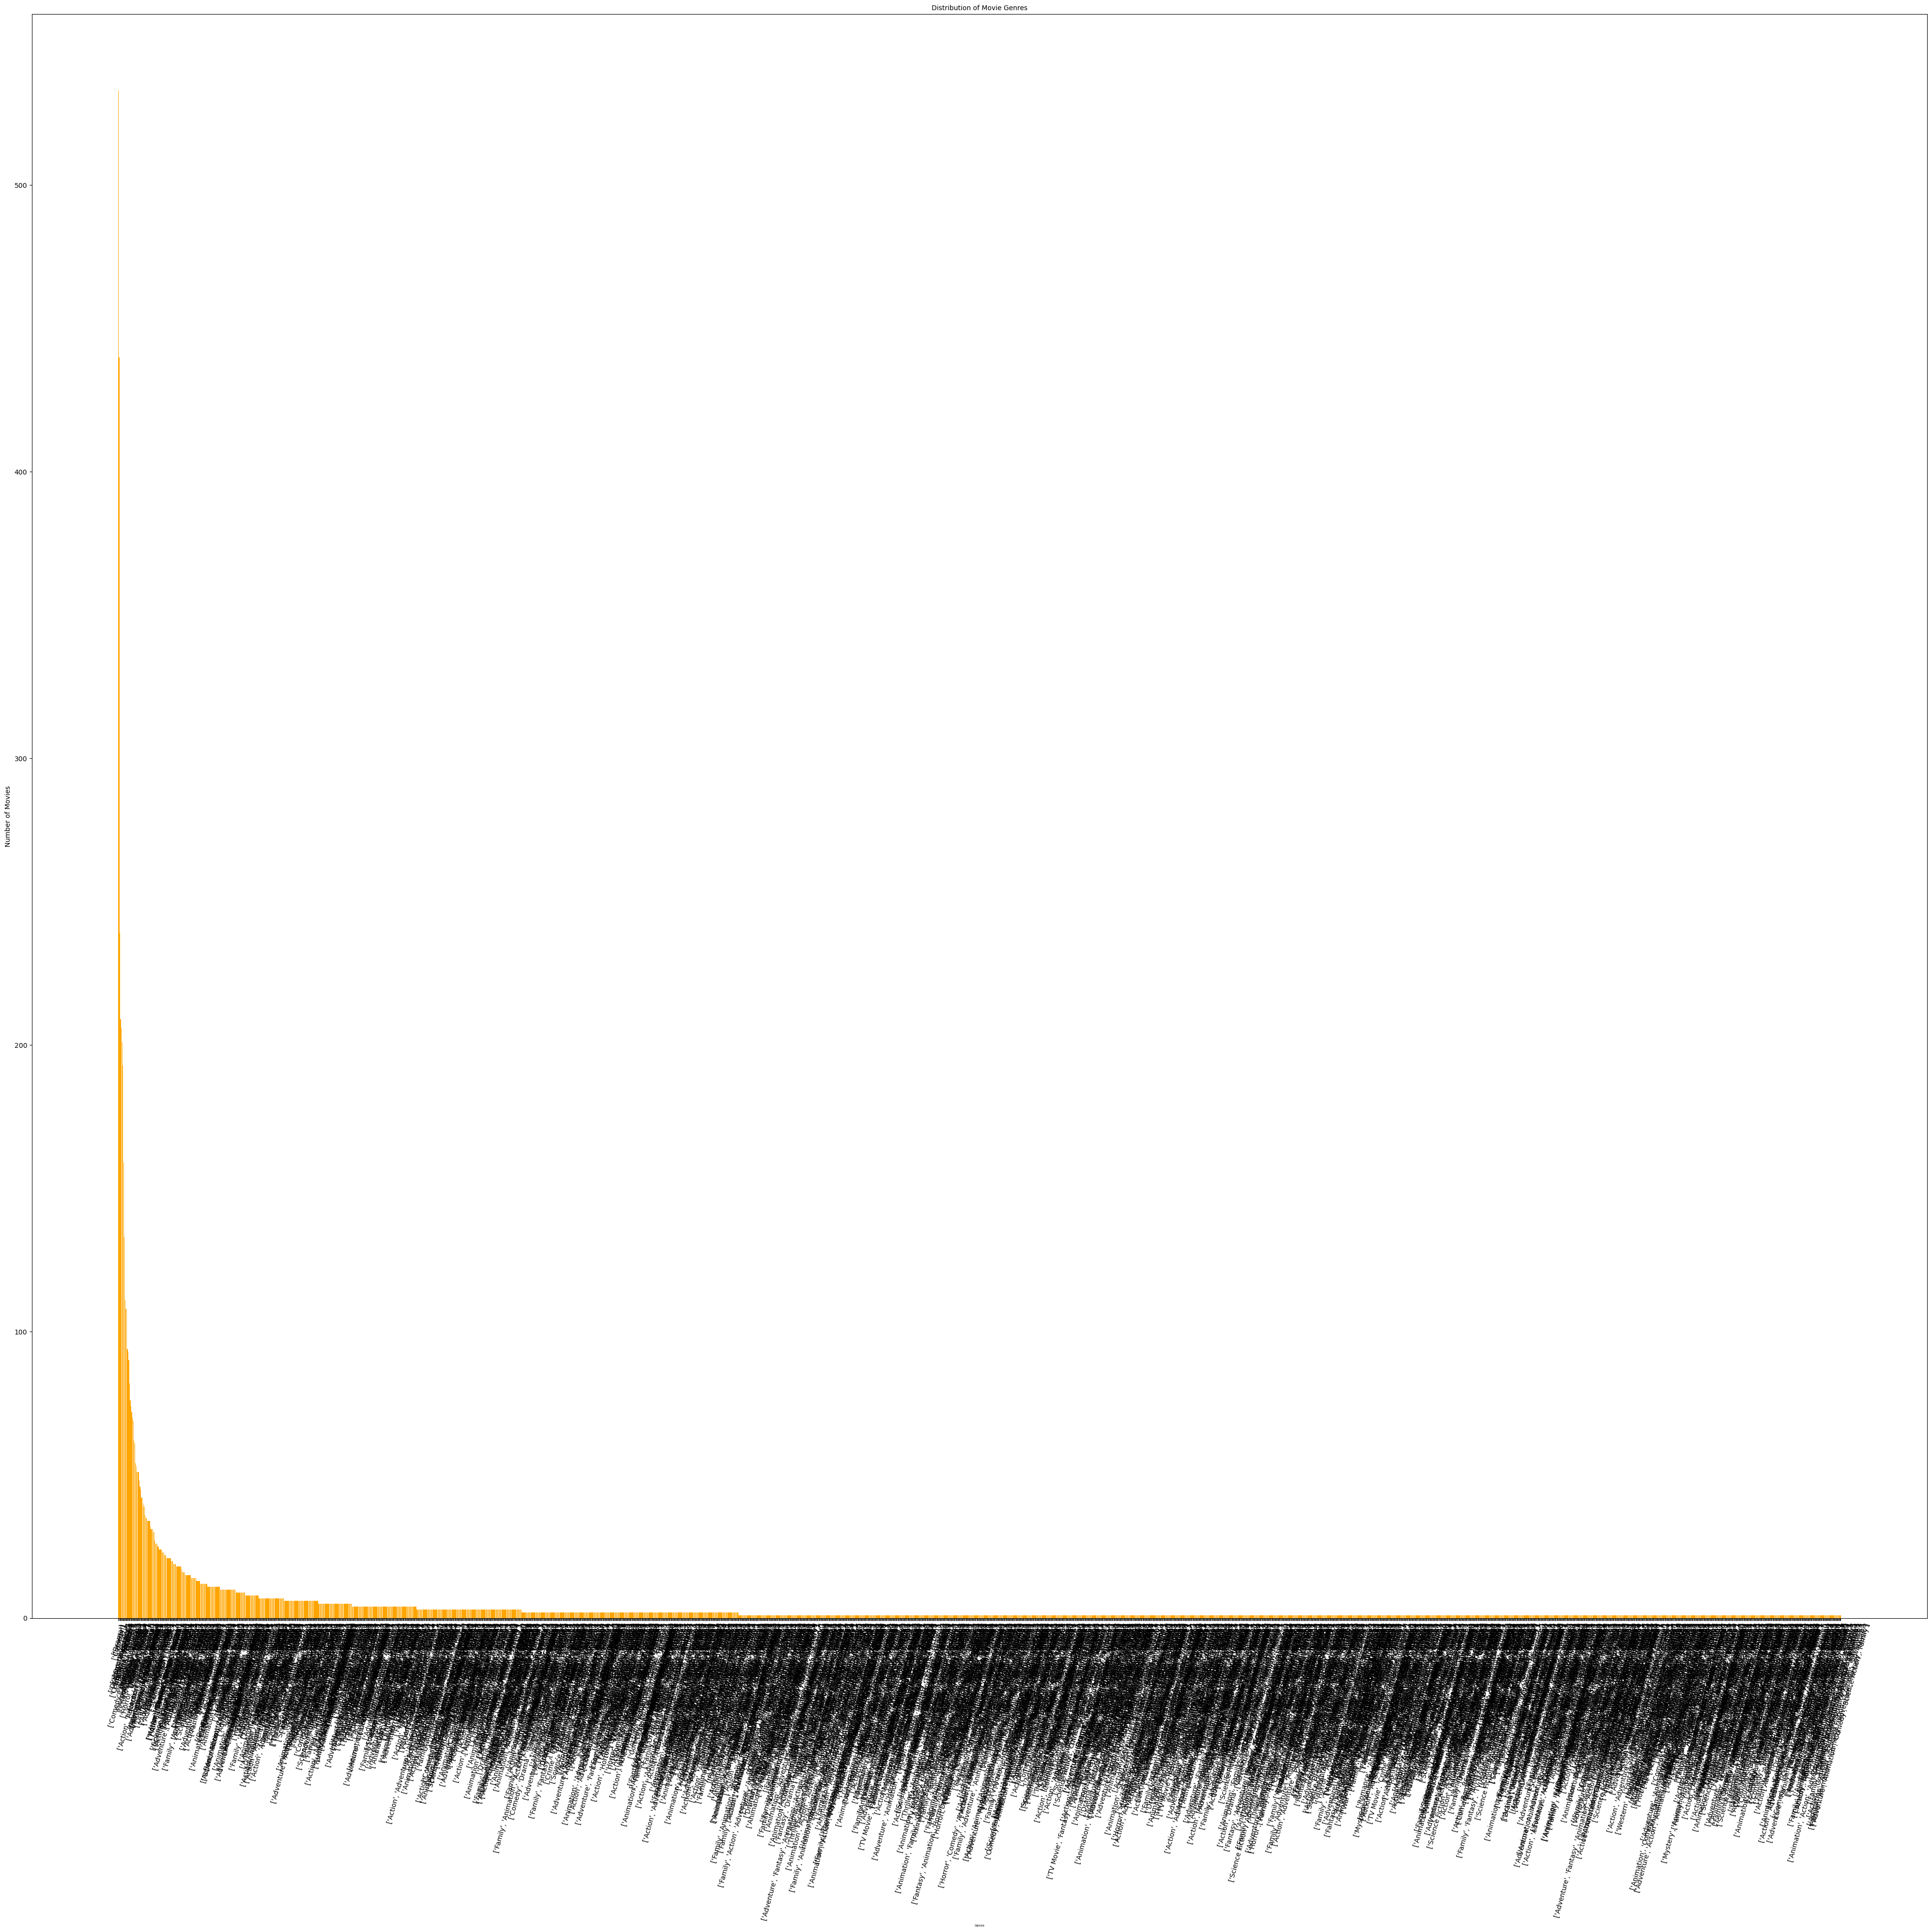

In [80]:
import matplotlib.pyplot as plt
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(40, 40))
plt.bar(genre_counts.index, genre_counts.values, color='orange')
plt.title('Distribution of Movie Genres', fontsize=10)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('Number of Movies', fontsize=10)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


# Movie Release Trends Over Time

<Axes: xlabel='release_year'>

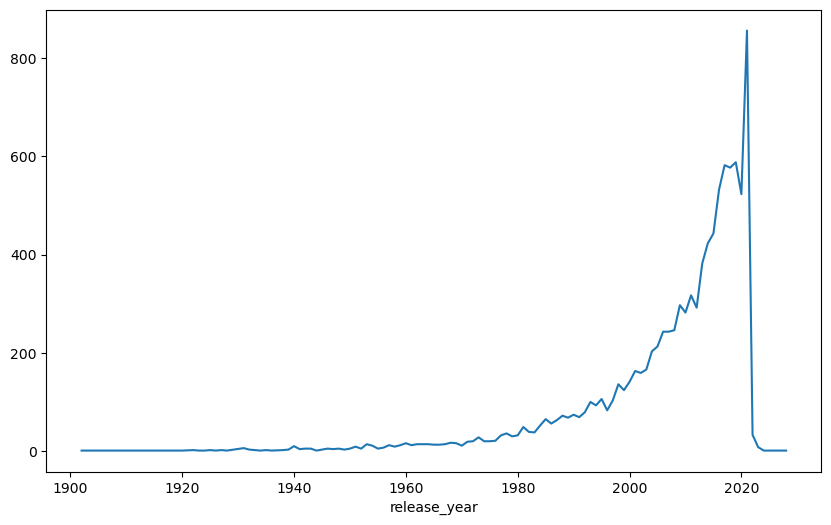

In [83]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))


<Axes: xlabel='release_year'>

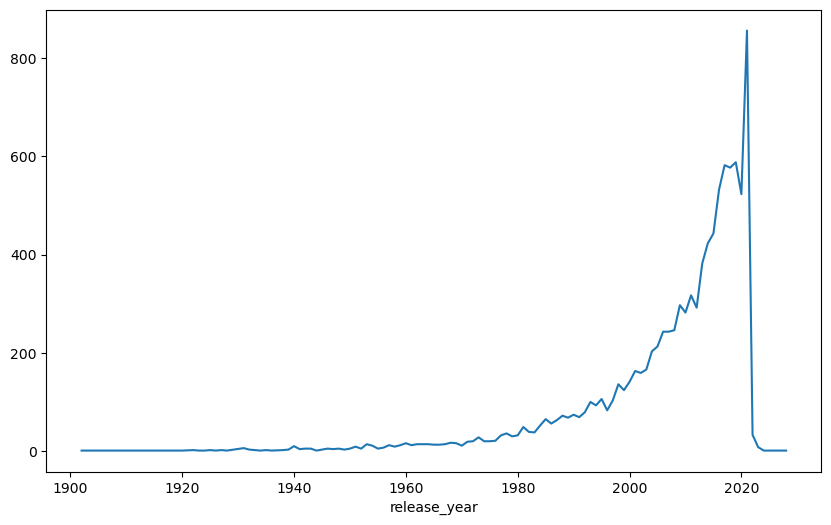

In [85]:
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))


# Revenue vs. Popularity

<Axes: xlabel='popularity', ylabel='revenue'>

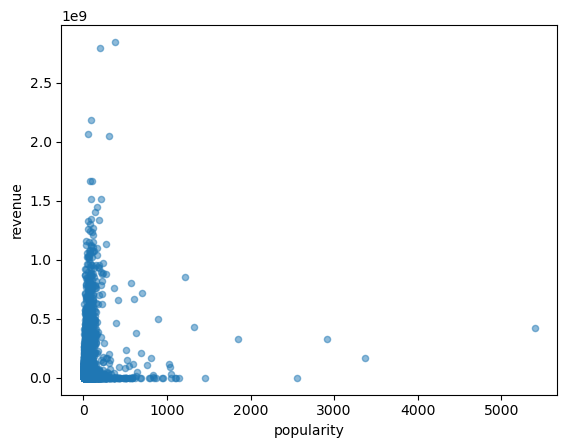

In [88]:
df.plot(kind='scatter', x='popularity', y='revenue', alpha=0.5)


# Revenue Distribution

<Axes: title={'center': 'Revenue Distribution'}, ylabel='Frequency'>

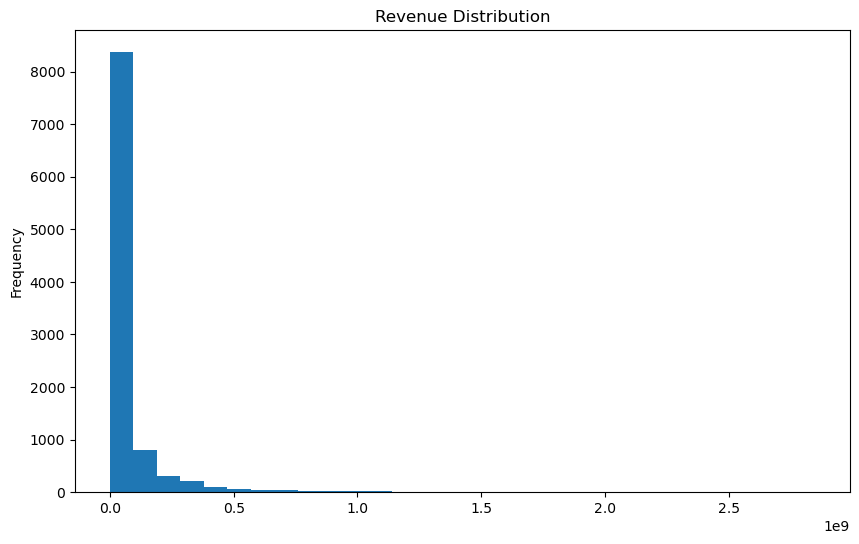

In [91]:
df['revenue'].plot(kind='hist', bins=30, figsize=(10,6), title='Revenue Distribution')


# Runtime Analysis

<Axes: >

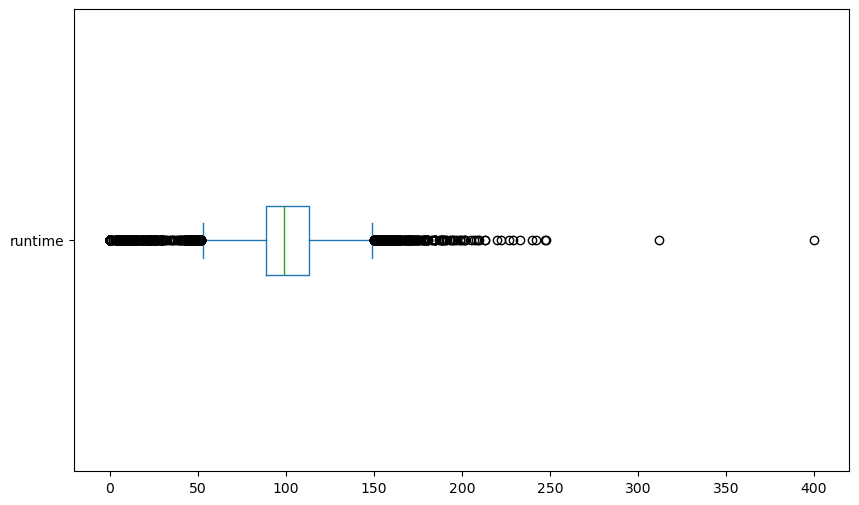

In [94]:
df['runtime'].plot(kind='box', vert=False, figsize=(10,6))


# Top Movies Based on Ratings and Votes


In [102]:
top_movies = df.sort_values(by='vote_average', ascending=False).head(10)


# Popular Languages


<Axes: title={'center': 'Popular Languages'}, xlabel='original_language'>

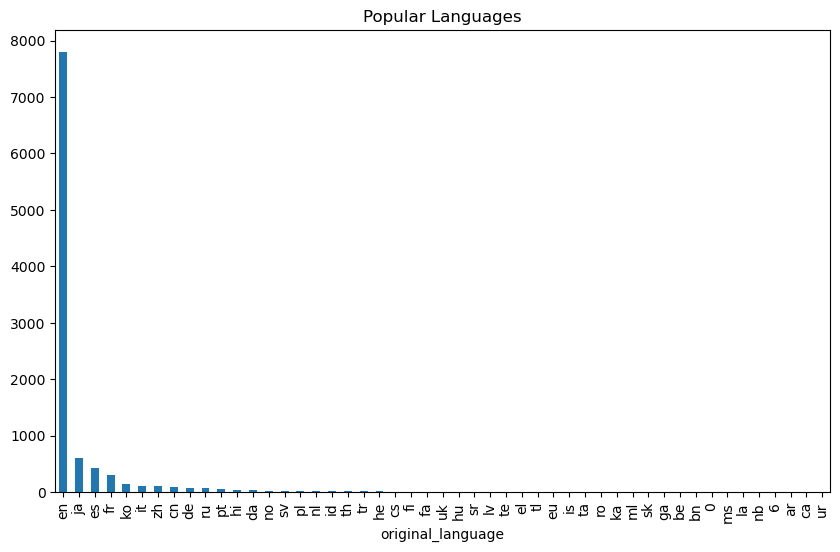

In [104]:
df['original_language'].value_counts().plot(kind='bar', figsize=(10,6), title='Popular Languages')


# Average Ratings Over Time

<Axes: title={'center': 'Average Ratings Over Time'}, xlabel='release_year'>

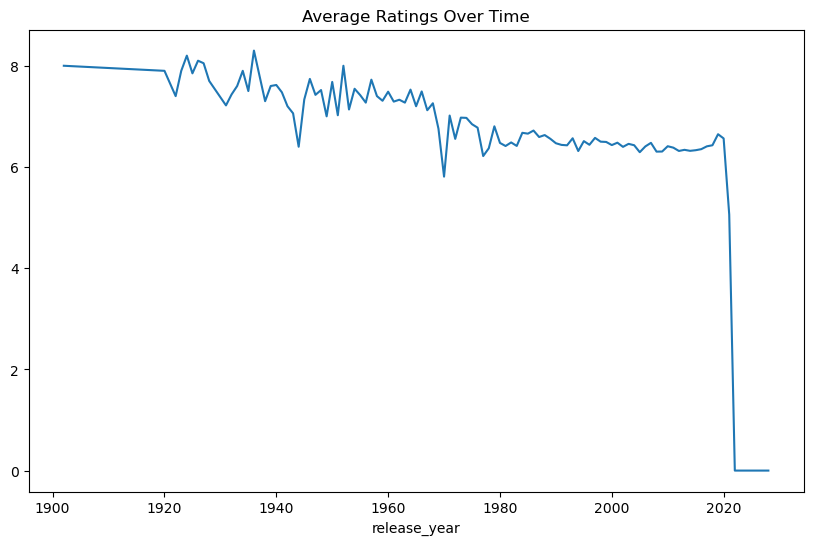

In [107]:
df.groupby('release_year')['vote_average'].mean().plot(kind='line', figsize=(10,6), title='Average Ratings Over Time')


# Tagline Analysis (Text Analysis)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.6 MB/s eta 0:00:00a 0:00:01


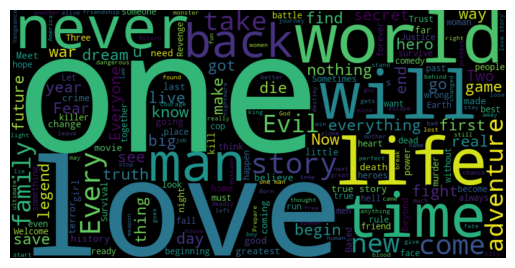

In [112]:
!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['tagline'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Correlation Analysis

<Axes: >

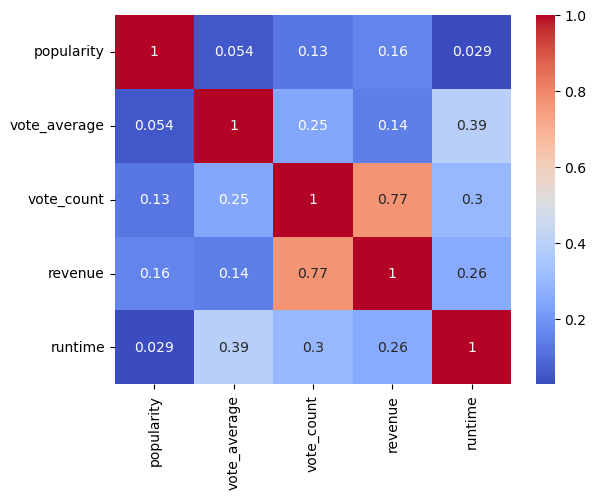

In [115]:
correlation_matrix = df[['popularity', 'vote_average', 'vote_count', 'revenue', 'runtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# Vote Count and Revenue by Genre

<Axes: title={'center': 'Average Revenue by Genre'}, xlabel='genre'>

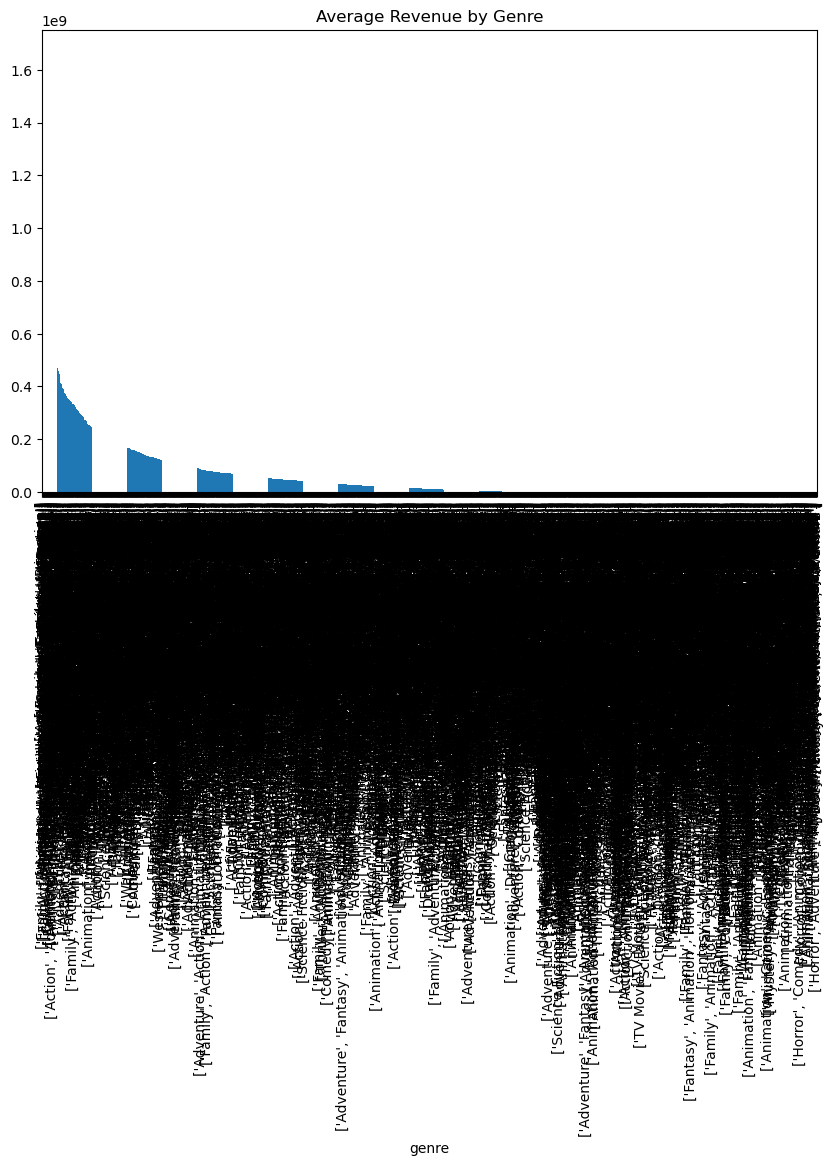

In [118]:
genre_revenue = df.groupby('genre')['revenue'].mean().sort_values(ascending=False)
genre_revenue.plot(kind='bar', figsize=(10,6), title='Average Revenue by Genre')


# Time Between Movie Releases (Sequel Analysis)

In [121]:
df['original_title'] = df['original_title'].str.lower()
title_counts = df['original_title'].value_counts()
sequel_titles = title_counts[title_counts > 1]


# Regression Model: Predicting Exact Movie Revenue

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting relevant features and target
features = ['popularity', 'vote_average', 'vote_count', 'runtime']
target = 'revenue'

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=features + [target])

# Splitting the data into features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Standardize the features (optional but helps some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R-squared: {r2}")


Linear Regression MSE: 9311261527458872.0
Linear Regression R-squared: 0.5894903163729426


In [128]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 7415808147126679.0
Random Forest R-squared: 0.6730560034922857


# Outlier Detection

In [150]:
from scipy import stats
z_scores = stats.zscore(df[['revenue', 'runtime', 'popularity']])
outliers = (z_scores > 3).sum(axis=1) > 0  # Rows with z-scores greater than 3 in any column
df[outliers]


Empty DataFrame
Columns: [Unnamed: 0, id, original_language, original_title, popularity, release_date, vote_average, vote_count, genre, overview, revenue, runtime, tagline, release_year]
Index: []

# Clustering Movies Based on Features

In [155]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df is your DataFrame
features = df[['popularity', 'vote_average', 'revenue', 'runtime']].dropna()

# Fit the KMeans model
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(features)

# Create a new column in df and set it to NaN by default
df['cluster'] = None

# Assign the cluster labels to the original DataFrame based on the index of features
df.loc[features.index, 'cluster'] = cluster_labels



# Success Prediction for Upcoming Movies

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define success as revenue greater than some threshold
df['success'] = df['revenue'] > 1e7  # Example threshold

# Create a features DataFrame and target variable
X = df[['popularity', 'runtime', 'vote_average', 'genre']]
y = df['success']

# One-hot encode the 'genre' column
X = pd.get_dummies(X, columns=['genre'], drop_first=True)  # Drop first to avoid dummy variable trap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# Correlation Between Popularity and Genre

<Axes: title={'center': 'Average Popularity by Genre'}, xlabel='genre'>

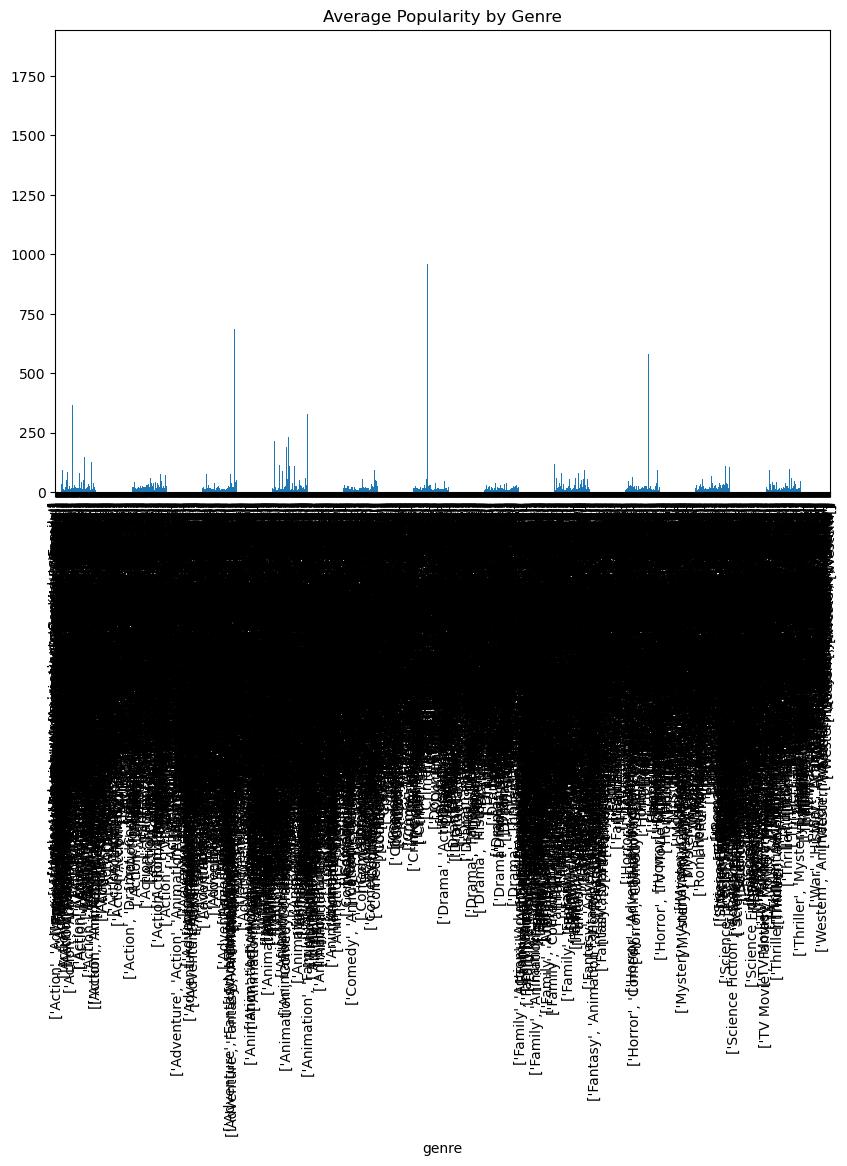

In [163]:
df.groupby('genre')['popularity'].mean().plot(kind='bar', figsize=(10,6), title='Average Popularity by Genre')


# Revenue by Country

<Axes: title={'center': 'Revenue by Genre'}, xlabel='genre'>

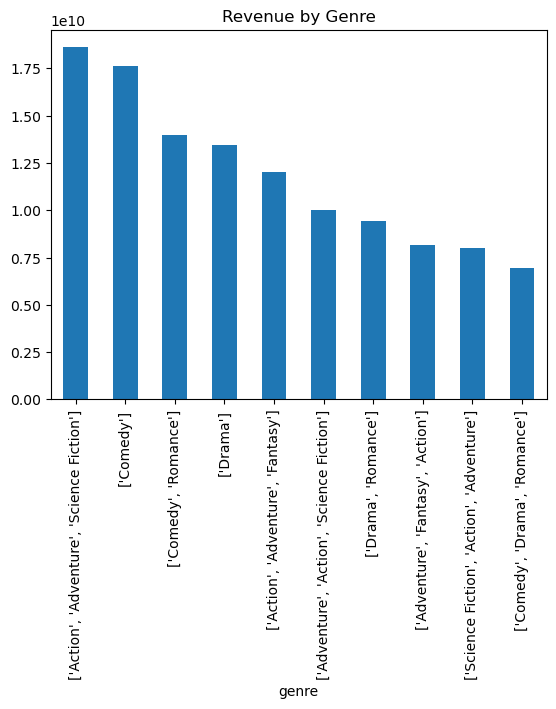

In [172]:

df.groupby('genre')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Revenue by Genre')


# Time Series Analysis

<Axes: title={'center': 'Average Monthly Revenue'}, xlabel='release_month'>

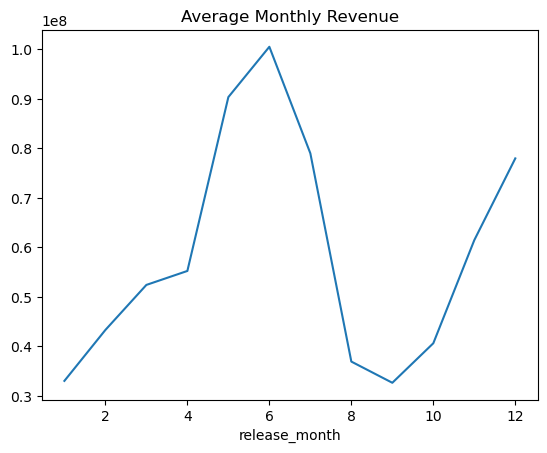

In [175]:
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month
df.groupby('release_month')['revenue'].mean().plot(kind='line', title='Average Monthly Revenue')


# Genre Overlap Analysis

In [32]:
df['genre_split'] = df['genre'].str.split('|')  # Assuming genres are separated by '|'
from collections import Counter
genre_combinations = Counter([tuple(sorted(genres)) for genres in df['genre_split'].dropna()])


# Revenue vs. Ratings by Genre

<Axes: xlabel='vote_average', ylabel='revenue'>

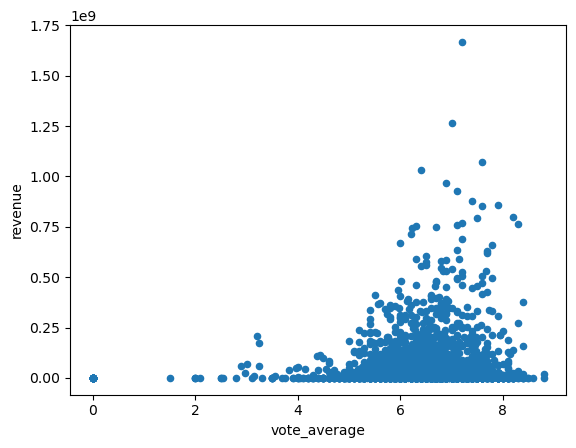

In [181]:
genre_rating_revenue = df.groupby('genre')[['vote_average', 'revenue']].mean()
genre_rating_revenue.plot(kind='scatter', x='vote_average', y='revenue')


# Average Rating and Popularity for Long Movies

In [184]:
long_movies = df[df['runtime'] > 120]
long_movies[['vote_average', 'popularity']].mean()


vote_average     6.988560
popularity      43.566985
dtype: float64

# Impact of Taglines on Popularity/Revenue

In [187]:
df['has_tagline'] = df['tagline'].notnull()
df.groupby('has_tagline')[['popularity', 'revenue']].mean()


popularity       revenue
has_tagline                          
False         32.486989  9.118164e+06
True          35.354459  7.727404e+07

# Revenue Growth Across Decades

<Axes: title={'center': 'Average Revenue per Decade'}, xlabel='release_decade'>

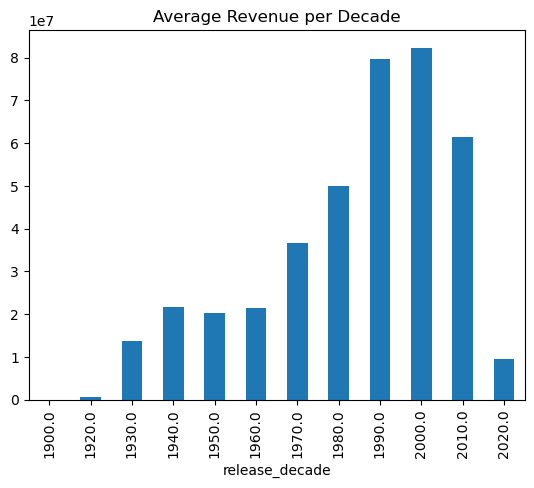

In [190]:
df['release_decade'] = (df['release_year'] // 10) * 10
df.groupby('release_decade')['revenue'].mean().plot(kind='bar', title='Average Revenue per Decade')


# Critically Acclaimed vs. Commercially Successful Movies

In [196]:
df['critically_acclaimed'] = df['vote_average'] > 8
df['commercially_successful'] = df['revenue'] > 1e8  # Example threshold



# Average Movie Ratings Over Time

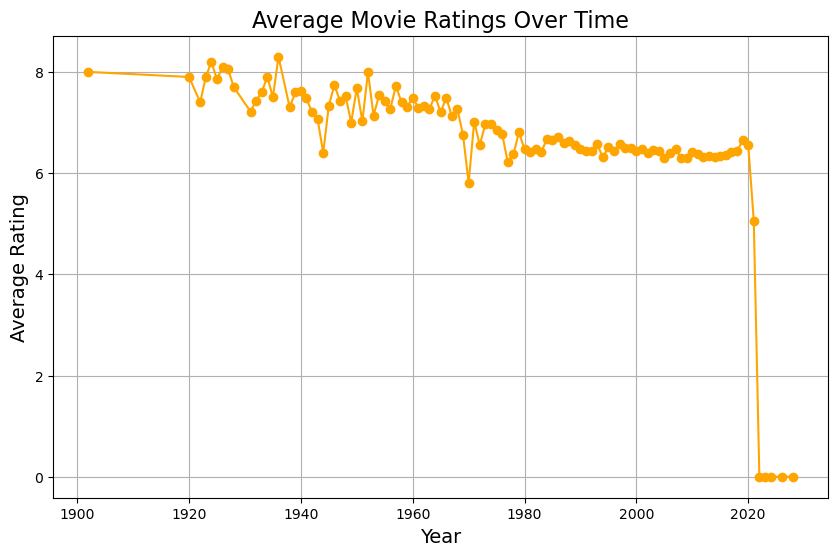

In [199]:
avg_ratings_per_year = df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_ratings_per_year.index, avg_ratings_per_year.values, marker='o', color='orange')
plt.title('Average Movie Ratings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.show()


# Runtime Distribution

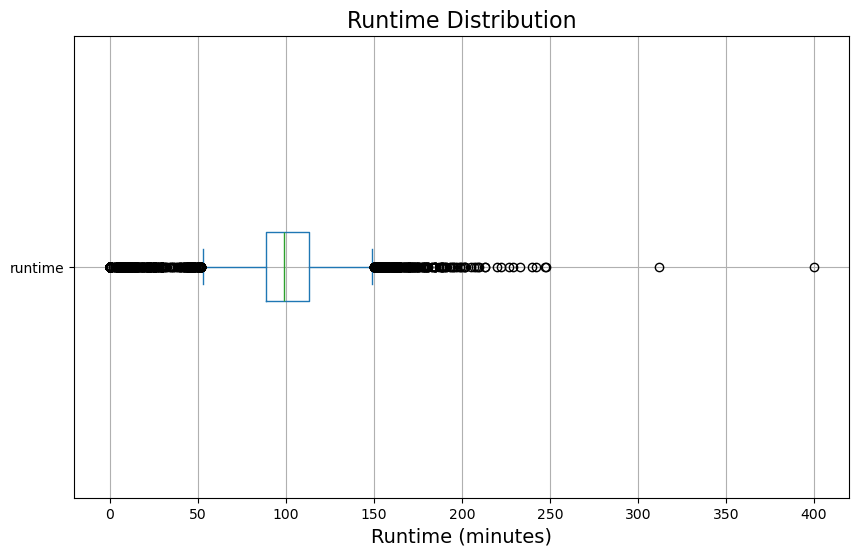

In [202]:
plt.figure(figsize=(10, 6))
df['runtime'].dropna().plot(kind='box', vert=False)
plt.title('Runtime Distribution', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.grid(True)
plt.show()


# Top 10 Movies by Rating

# Popularity by Genre

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28357 (\N{CJK UNIFIED IDEOGRAPH-6EC5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20995 (\N{CJK UNIFIED IDEOGRAPH-5203}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20804 (\N{CJK UNIFIED IDEOGRAPH-5144}) missing from current font.
  fig.canvas.print_figure(bytes_io,

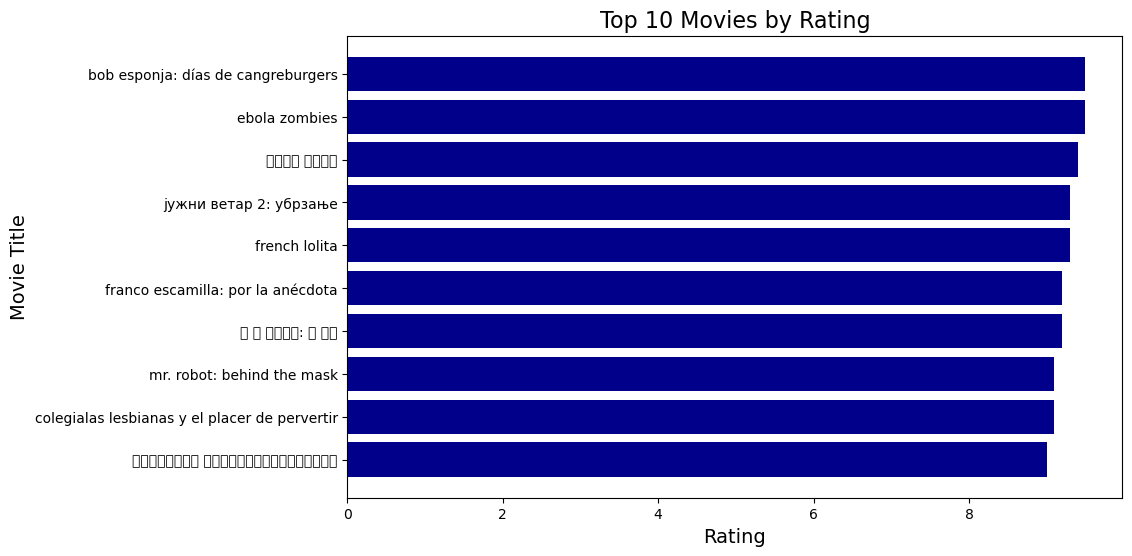

In [205]:
top_10_movies = df.sort_values(by='vote_average', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['original_title'], top_10_movies['vote_average'], color='darkblue')
plt.title('Top 10 Movies by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.gca().invert_yaxis()  # To show the highest-rated at the top
plt.show()


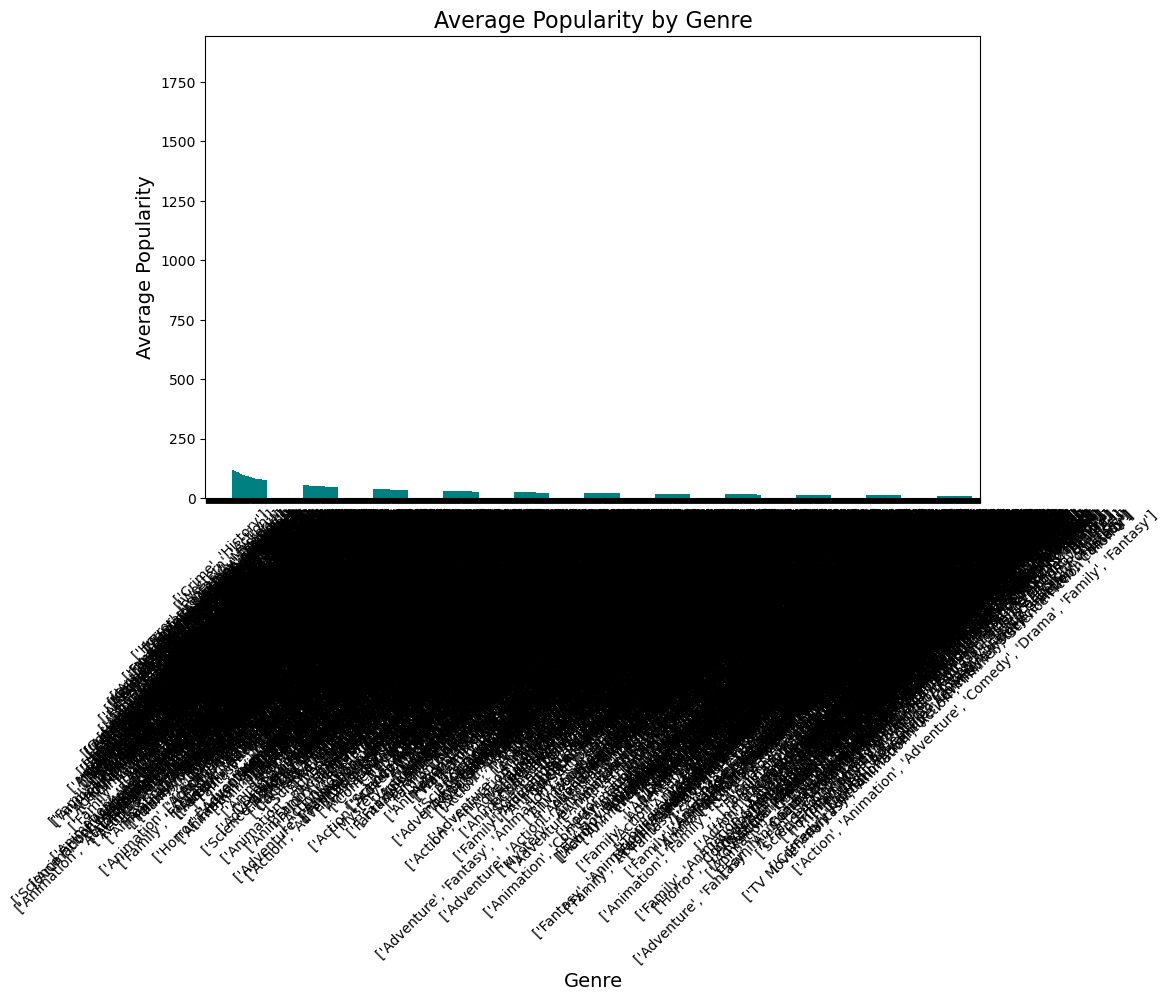

In [208]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_popularity.plot(kind='bar', color='teal')
plt.title('Average Popularity by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Correlation Heatmap

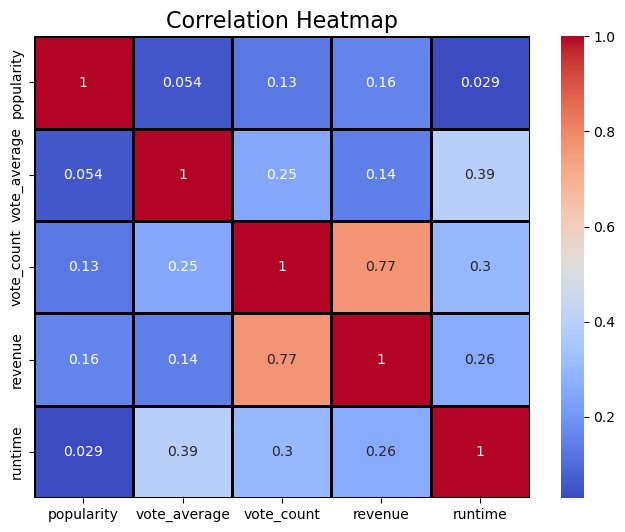

In [211]:
import seaborn as sns
corr_matrix = df[['popularity', 'vote_average', 'vote_count', 'revenue', 'runtime']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Number of Movies Released by Month

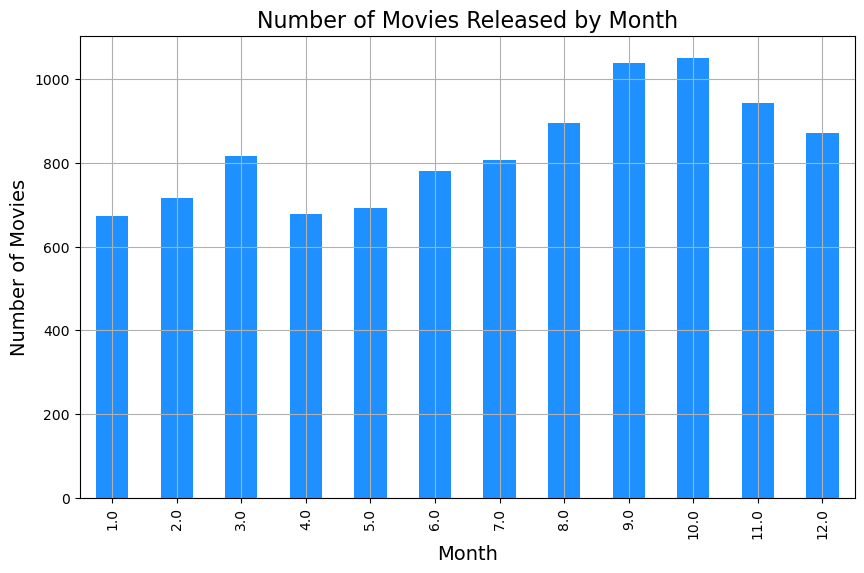

In [214]:
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month
movies_per_month = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar', color='dodgerblue')
plt.title('Number of Movies Released by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(True)
plt.show()


# Average Runtime by Genre

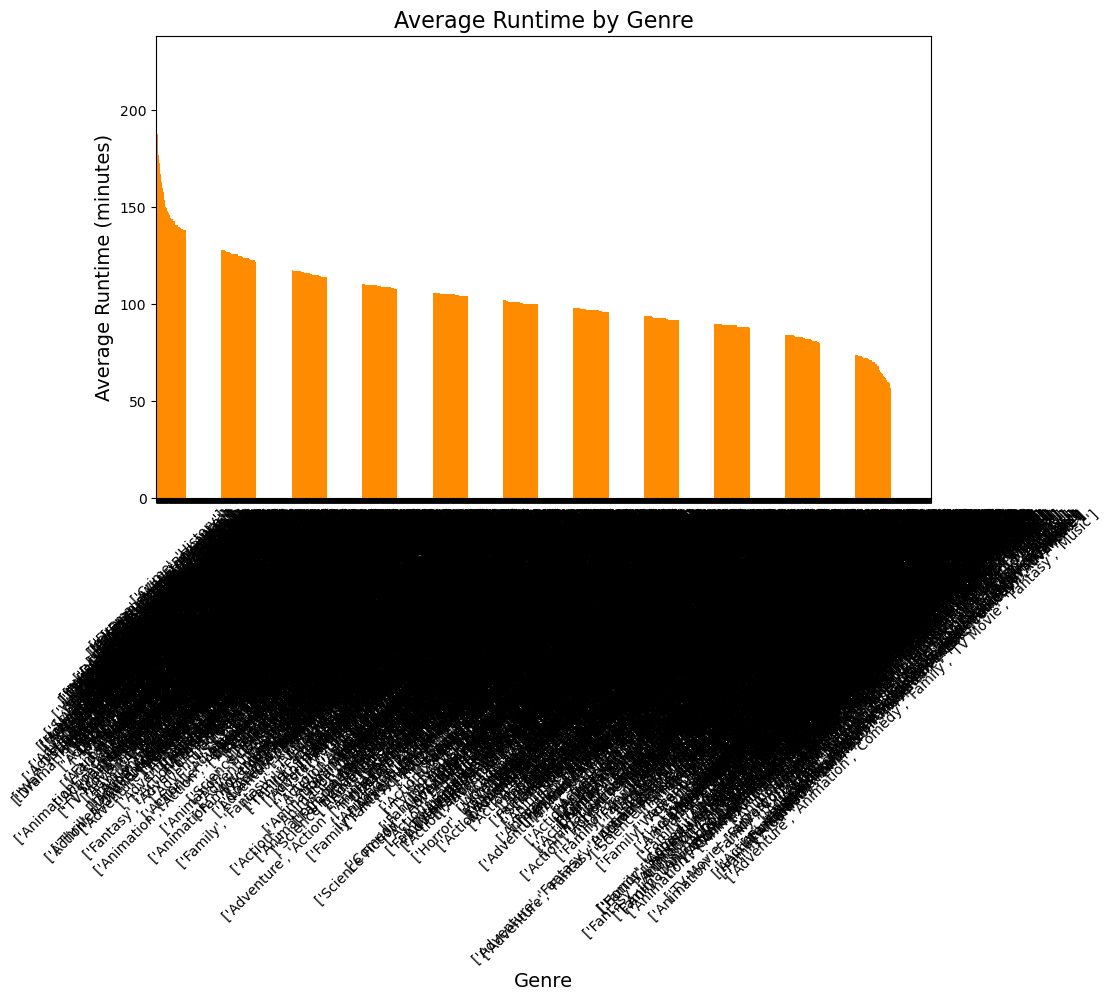

In [217]:
avg_runtime_per_genre = df.groupby('genre')['runtime'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_runtime_per_genre.plot(kind='bar', color='darkorange')
plt.title('Average Runtime by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Runtime (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [221]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


# Distribution of Movie Ratings

  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


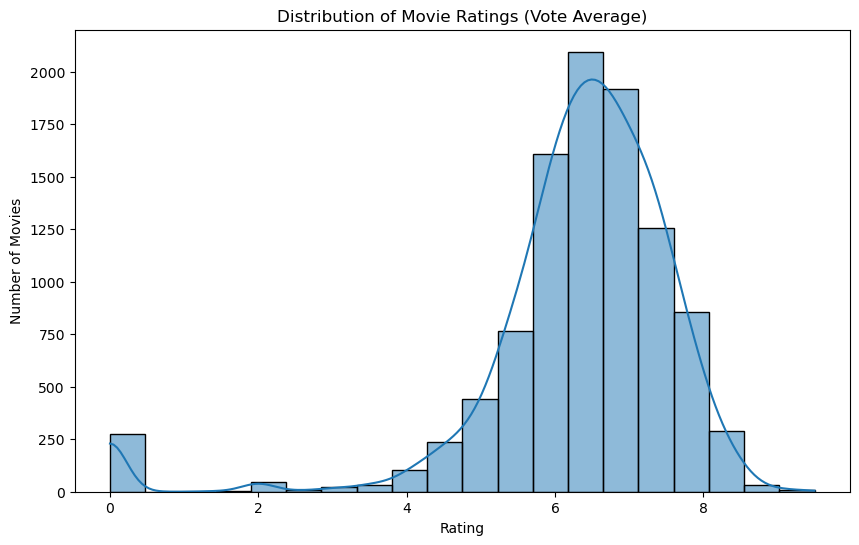

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Display the first few rows of the dataset
print(df.head())

# Plotting distribution of movie ratings (vote_average)
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings (Vote Average)')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


# Revenue Distribution

  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


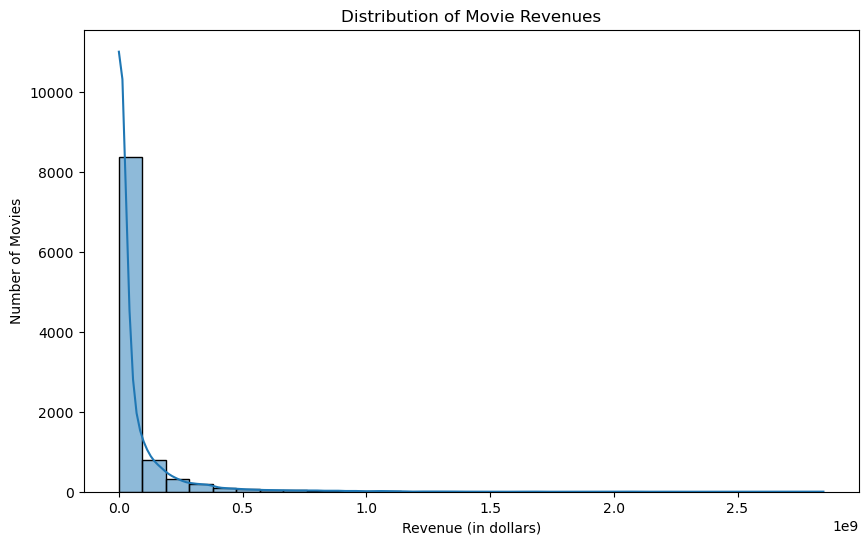

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Display the first few rows of the dataset
print(df.head())

# Plotting distribution of movie revenues
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue (in dollars)')
plt.ylabel('Number of Movies')
plt.show()


# Genre Frequency

  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


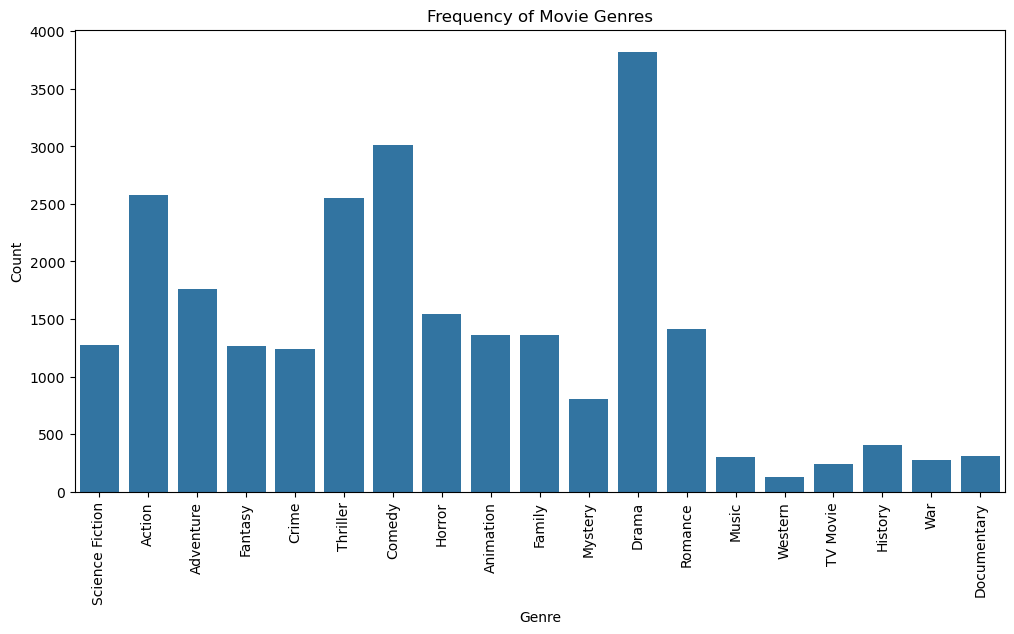

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Display the first few rows of the dataset
print(df.head())

# Convert genre column from string to list
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Count the frequency of each genre
genre_list = df['genre'].explode().dropna()  # Exploding the list of genres into separate rows
genre_counts = Counter(genre_list)  # Counting the frequency of each genre

# Plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# Movie Release Trend Over Time

  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


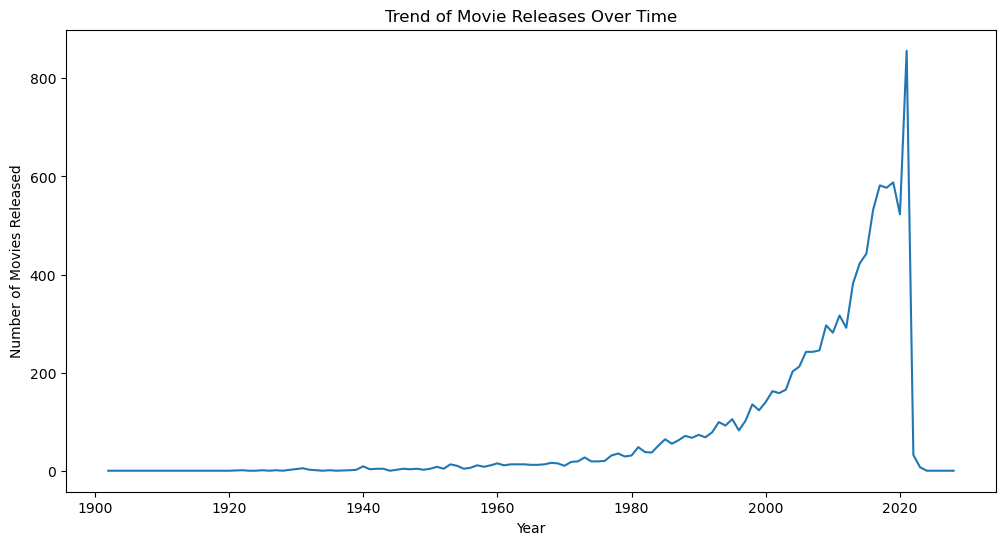

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Display the first few rows of the dataset
print(df.head())

# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Count the number of movies released each year
release_trend = df.groupby('release_year').size()

# Plot movie release trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values)
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()



# Summarization of the datset

In [241]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Summary of the dataset
def summarize_dataset(df):
    print("===== Basic Information =====")
    df.info()  # Basic info including data types and missing values
    print("\n")

    print("===== Descriptive Statistics (Numerical Columns) =====")
    print(df.describe())  # Summary stats for numerical columns
    print("\n")

    print("===== Descriptive Statistics (Categorical Columns) =====")
    print(df.describe(include=['object']))  # Summary stats for categorical columns
    print("\n")

    print("===== Missing Values =====")
    print(df.isnull().sum())  # Count of missing values for each column
    print("\n")

    print("===== Unique Values per Column =====")
    print(df.nunique())  # Count of unique values in each column
    print("\n")

    # Select only numerical columns for correlation
    numeric_df = df.select_dtypes(include=['number'])

    print("===== Correlation Matrix (Numerical Columns) =====")
    correlation_matrix = numeric_df.corr()
    print(correlation_matrix)
    print("\n")

    # Overview of the first few rows
    print("===== First Few Rows =====")
    print(df.head())

# Call the function to summarize the dataset
summarize_dataset(df)



===== Basic Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10014 non-null  object 
 1   id                 10002 non-null  float64
 2   original_language  10002 non-null  object 
 3   original_title     10001 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  float64
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            9998 non-null   float64
 11  runtime            9989 non-null   float64
 12  tagline            7079 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1017.2+ KB


===== Descriptive Statistics (Numerical Columns) =====
                  id    popul

===== Basic Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10014 non-null  object 
 1   id                 10002 non-null  float64
 2   original_language  10002 non-null  object 
 3   original_title     10001 non-null  object 
 4   popularity         10000 non-null  float64
 5   release_date       9962 non-null   object 
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  float64
 8   genre              10000 non-null  object 
 9   overview           9900 non-null   object 
 10  revenue            9998 non-null   float64
 11  runtime            9989 non-null   float64
 12  tagline            7079 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1017.2+ KB


===== Descriptive Statistics (Numerical Columns) =====
                  id    popul

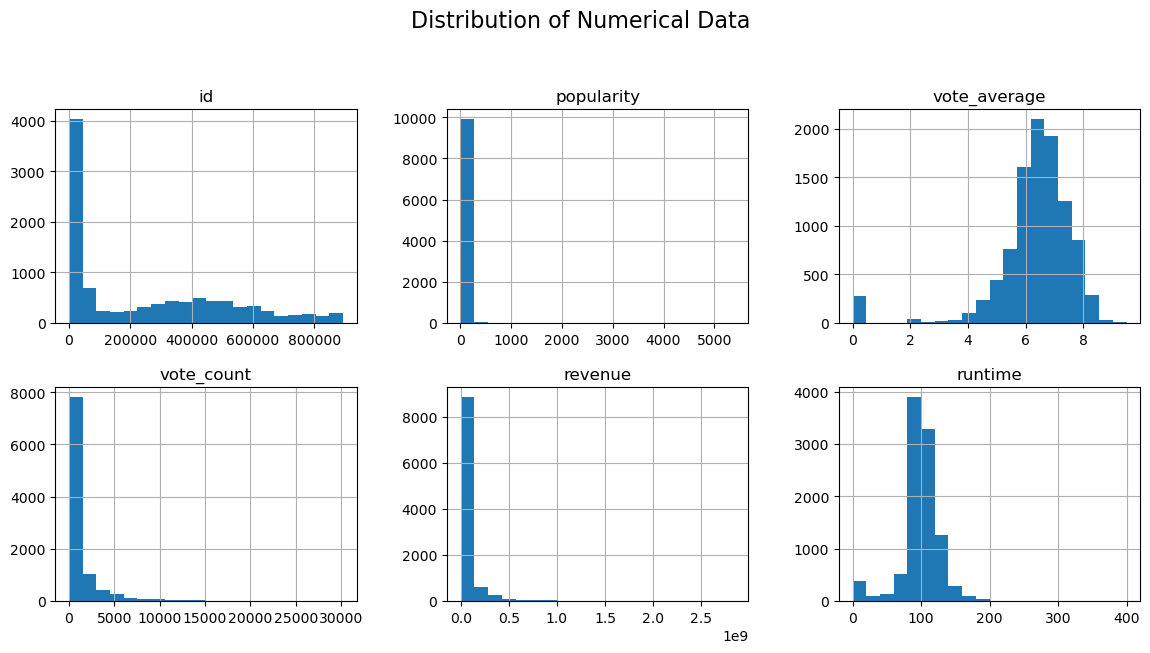

===== Correlation Matrix =====


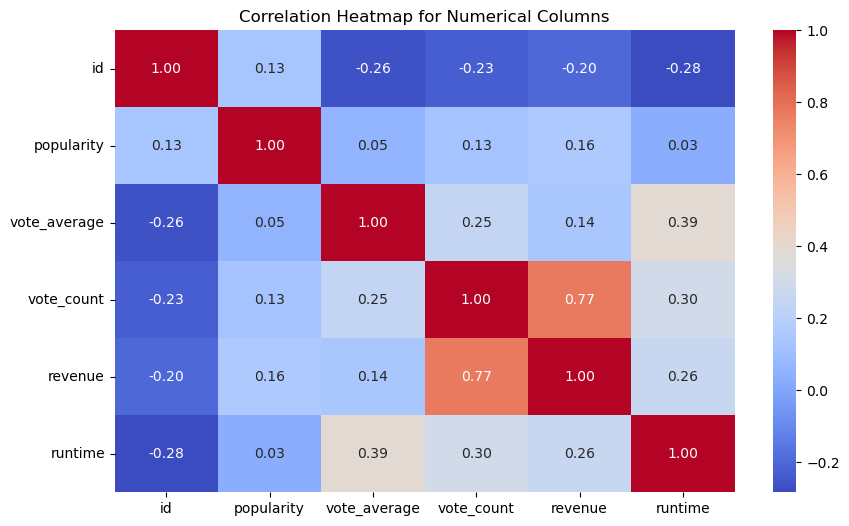

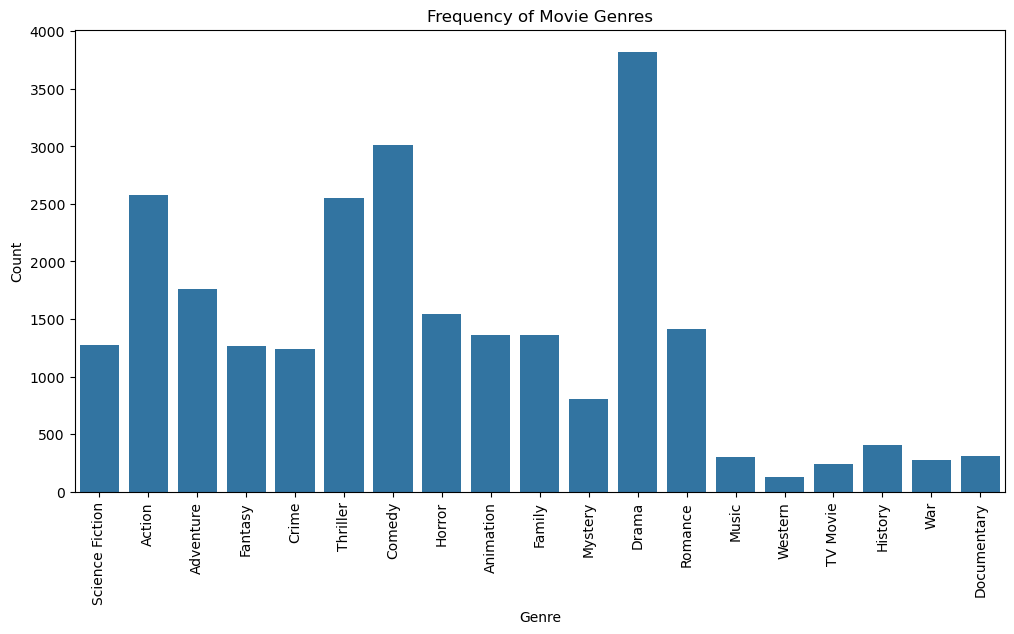

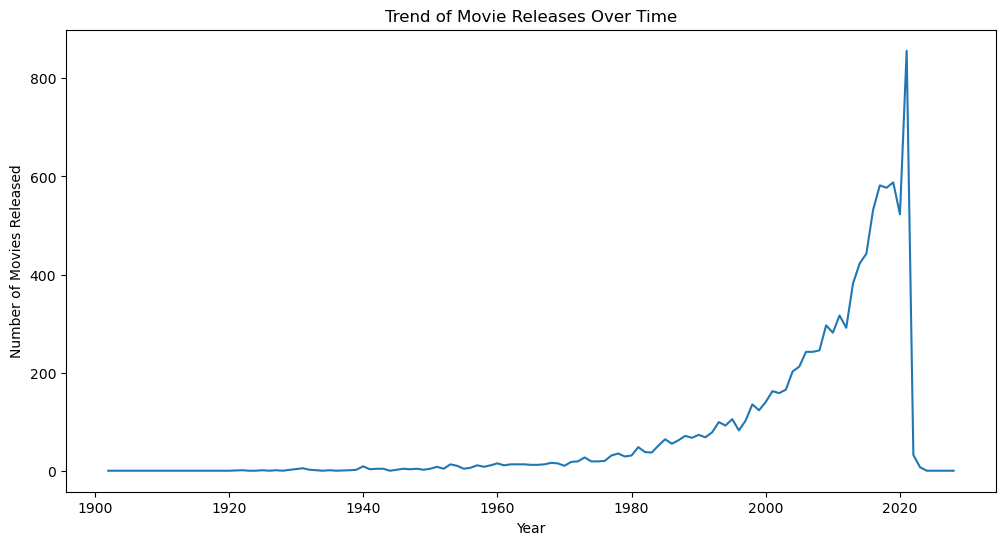

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Load the dataset
df = pd.read_csv('Top_10000_Movies.csv', engine='python')

# Summary of the dataset with visualizations
def summarize_and_visualize(df):
    print("===== Basic Information =====")
    df.info()  # Basic info including data types and missing values
    print("\n")

    print("===== Descriptive Statistics (Numerical Columns) =====")
    print(df.describe())  # Summary stats for numerical columns
    print("\n")

    print("===== Descriptive Statistics (Categorical Columns) =====")
    print(df.describe(include=['object']))  # Summary stats for categorical columns
    print("\n")

    print("===== Missing Values =====")
    print(df.isnull().sum())  # Count of missing values for each column
    print("\n")

    print("===== Unique Values per Column =====")
    print(df.nunique())  # Count of unique values in each column
    print("\n")

    # Visualizing the distribution of numerical columns
    print("===== Distribution of Numerical Columns =====")
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns].hist(bins=20, figsize=(14, 10), layout=(3, 3))
    plt.suptitle('Distribution of Numerical Data', fontsize=16)
    plt.show()

    # Correlation heatmap (only for numerical columns)
    print("===== Correlation Matrix =====")
    numeric_df = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()

    # Plotting the heatmap of correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numerical Columns')
    plt.show()

    # Convert genre column from string to list (if it's stored as strings)
    if 'genre' in df.columns:
        df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

        # Count the frequency of each genre
        genre_list = df['genre'].explode().dropna()
        genre_counts = Counter(genre_list)

        # Plot the top genres
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
        plt.xticks(rotation=90)
        plt.title('Frequency of Movie Genres')
        plt.xlabel('Genre')
        plt.ylabel('Count')
        plt.show()

    # Convert release_date to datetime format
    if 'release_date' in df.columns:
        df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

        # Extract year from release_date
        df['release_year'] = df['release_date'].dt.year

        # Count the number of movies released each year
        release_trend = df.groupby('release_year').size()

        # Plot movie release trend over the years
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=release_trend.index, y=release_trend.values)
        plt.title('Trend of Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies Released')
        plt.show()

# Call the function to summarize and visualize the dataset
summarize_and_visualize(df)
